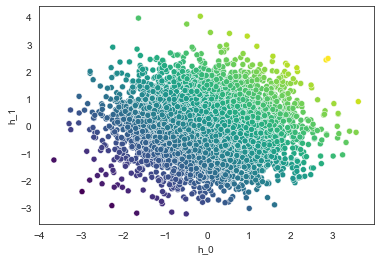

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

seed_n = 1
np.random.seed(seed_n)

# Generate Gaussian white noise data
mean, std, h_shape = 0, 1, (5000, 2)
hidden = np.random.normal(mean, std, h_shape)

# Create a dataframe to carry the data
column_names = [f'h_{i}' for i in range(h_shape[1])]
data = pd.DataFrame(hidden, columns=column_names)

# Define linear labels
data['y'] = data['h_0'] + data['h_1']

# Settings for plots
sns.set_style('white')
viridis_map = sns.color_palette('viridis', as_cmap=True)

# Plot the hidden factors colored by y
sns.scatterplot(data=data, x='h_0', y='h_1', hue='y',
                palette=viridis_map).get_legend().remove()
plt.show()

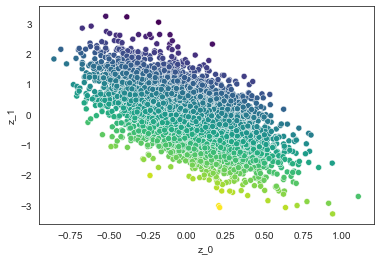

In [2]:
# Define a linear transformation of h as z
c = np.random.normal(mean, std, 4)
data['z_0'] = c[0] * data['h_0'] + c[1] * data['h_1']
data['z_1'] = c[2] * data['h_0'] + c[3] * data['h_1']

# Plot the latent representation colored by y
sns.scatterplot(data=data, x='z_0', y='z_1', hue='y',
                palette=viridis_map).get_legend().remove()
plt.show()

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Train two random forest models
h, z, y = data[['h_0', 'h_1']], data[['z_0', 'z_1']], data['y']
regressor_h = RandomForestRegressor(max_depth=5).fit(h, y)
regressor_z = RandomForestRegressor(max_depth=5).fit(z, y)

# Get the accuracy of the models
print(f'h score: {regressor_h.score(h, y):.2f},\n'
      f'z score: {regressor_z.score(z, y):.2f}')

h score: 0.97,
z score: 0.98
